In [1]:
#!pip install sentinelsat

In [2]:
#!pip install folium

In [3]:
#!pip install geopandas

# Import libraries

In [5]:
from sentinelsat import SentinelAPI
import rasterio
import rasterio.mask as mk
import rasterio as rio
import numpy as np
from matplotlib.pyplot import *

## Connect to the API using a username and password - if you don't have these set one up on scihub

In [6]:
user = 'ishango1' 
password = 'ishango1' 
api = SentinelAPI(user,password, 'https://scihub.copernicus.eu/dhus')

## Plot a boundary in WGS 84 EPSG code 4326 on a folium slipping map

In [7]:
import geopandas as gpd
import folium 

nReserve = gpd.read_file('C:/Users/jeannine/Documents/code/MWI_adm1.shp')

m = folium.Map([-13.2512161,34.3015278], zoom_start=7)
folium.GeoJson(nReserve).add_to(m)
m

In [8]:
# from shapely.geometry import MultiPolygon, Polygon

# footprint = None
# for i in nReserve['geometry']:
#     footprint = i

In [9]:
# footprint = None
# for i in nReserve["geometry"]:
#     footprint = i

In [10]:
from sentinelsat.sentinel import geojson_to_wkt, read_geojson

In [11]:
footp = "C:/Users/jeannine/Documents/code/map8.geojson"

footprint = geojson_to_wkt(read_geojson(footp))


# Search

In [12]:
Products = api.query(footprint,
                     date = ('20210825', '20210925'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,10)
                    )

#print((Products))

Querying products:  41%|####1     | 100/241 [00:00<?, ?product/s]

In [13]:
products_gdf = api.to_geodataframe(Products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted.head(2)

title  \
074582b9-39f1-4a61-984b-9c9027c64247  S2A_MSIL2A_20210826T073611_N0301_R092_T36LZK_2...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  S2A_MSIL2A_20210829T074611_N0301_R135_T36LXN_2...   

                                                                                   link  \
074582b9-39f1-4a61-984b-9c9027c64247  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                       link_alternative  \
074582b9-39f1-4a61-984b-9c9027c64247  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                              link_icon  \
074582b9-39f1-4a61-984b-9c9027c64247  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                                summary  \
074582b9-39f1-4a61-984b-9c9027c64247  Date: 2021-08-26T07:36:11.024Z, Instrument: MS...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  Date: 2021-08-29T07:46:11.024Z, Instrument: MS...   

                                     ondemand      generationdate  \
074582b9-39f1-4a61-984b-9c9027c64247    false 2021-08-26 10:26:24   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b    false 2021-08-29 10:26:24   

                                               beginposition  \
074582b9-39f1-4a61-984b-9c9027c64247 2021-08-26 07:36:11.024   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b 2021-08-29 07:46:11.024   

                                                 endposition  \
074582b9-39f1-4a61-984b-9c9027c64247 2021-08-26 07:36:11.024   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b 2021-08-29 07:46:11.024   

                                               ingestiondate  ...  \
074582b9-39f1-4a61-984b-9c9027c64247 2021-08-26 14:00:12.958  ...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b 2021-08-29 14:04:17.964  ...   

                                      producttype  platformidentifier  \
074582b9-39f1-4a61-984b-9c9027c64247      S2MSI2A           2015-028A   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b      S2MSI2A           2015-028A   

                                      orbitdirection  \
074582b9-39f1-4a61-984b-9c9027c64247      DESCENDING   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b      DESCENDING   

                                      platformserialidentifier  \
074582b9-39f1-4a61-984b-9c9027c64247               Sentinel-2A   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b               Sentinel-2A   

                                      processinglevel  \
074582b9-39f1-4a61-984b-9c9027c64247         Level-2A   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b         Level-2A   

                                                                    datastripidentifier  \
074582b9-39f1-4a61-984b-9c9027c64247  S2A_OPER_MSI_L2A_DS_VGS1_20210826T102624_S2021...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  S2A_OPER_MSI_L2A_DS_VGS1_20210829T102624_S2021...   

                                                                      granuleidentifier  \
074582b9-39f1-4a61-984b-9c9027c64247  S2A_OPER_MSI_L2A_TL_VGS1_20210826T102624_A0322...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  S2A_OPER_MSI_L2A_TL_VGS1_20210829T102624_A0323...   

                                                                             identifier  \
074582b9-39f1-4a61-984b-9c9027c64247  S2A_MSIL2A_20210826T073611_N0301_R092_T36LZK_2...   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  S2A_MSIL2A_20210829T074611_N0301_R135_T36LXN_2...   

                                                                      uuid  \
074582b9-39f1-4a61-984b-9c9027c64247  074582b9-39f1-4a61-984b-9c9027c64247   
f89d9b8c-0065-4c03-9f5b-868f8fa5045b  f89d9b8c-0065-4c03-9f5b-868f8fa5045b   

                                                                               geometry  
074

In [14]:
#api.download("16e95baf-bbcb-43fe-ab67-5fecea2ffde5")

<AxesSubplot:>

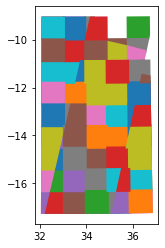

In [15]:
areas = api.to_geodataframe(Products)
areas.plot(column='uuid', cmap=None)

In [16]:
#areas.uuid

In [17]:
len(products_gdf)

241

In [18]:
# This function check if the products ID is available online
# if true --> True
# if False --> False
def checkProductID():
    for i in range(len(products_gdf['uuid'])):
        product_id = api.get_product_odata(products_gdf['uuid'][i])
        for j in product_id.keys():
            if j == 'Online':
                print(f"For the index = {i} , the product {products_gdf['uuid'][i]}"
                      f" is online True or False? :  {product_id[j]}")


In [19]:
checkProductID()

For the index = 0 , the product 39ccba0c-0109-4bb8-96a3-9658c9f59398 is online True or False? :  True
For the index = 1 , the product 34f6057c-d768-4469-82f1-7e17d7f2df02 is online True or False? :  True
For the index = 2 , the product 4b99068c-da5d-4f5c-8039-7f6a44f9e58d is online True or False? :  True
For the index = 3 , the product e9299cc3-461b-458c-88f6-da85051f048a is online True or False? :  True
For the index = 4 , the product 97b37d7b-aff6-4b10-927f-325564629dec is online True or False? :  True
For the index = 5 , the product 07fba9d1-3cc0-4eb7-a6fd-9e1624172c30 is online True or False? :  True
For the index = 6 , the product 0367ac1d-2d18-44fe-a7a3-296a6419cc4f is online True or False? :  True
For the index = 7 , the product e8c18e03-5aa5-404c-b19d-2f64db9a3a1a is online True or False? :  True
For the index = 8 , the product 9034abe4-0379-471a-a0dd-a3072d6092e4 is online True or False? :  True
For the index = 9 , the product ff72ab63-2208-426b-93e8-6bf0684b4ad7 is online Tru

For the index = 80 , the product add2f4ed-dd08-4fec-9cbc-e8d383b53d38 is online True or False? :  True
For the index = 81 , the product 1f13d069-c90f-4496-a3a9-373696b4061b is online True or False? :  True
For the index = 82 , the product 3b377e47-ef57-4a23-959f-472fb079b75b is online True or False? :  True
For the index = 83 , the product d97926c7-e55d-4427-8336-7f9ea7cc2015 is online True or False? :  True
For the index = 84 , the product 745f1333-2cd5-4a0f-bd6e-8d0b2a885403 is online True or False? :  True
For the index = 85 , the product e94a4695-4c7d-4fcd-87a9-817dc07cb760 is online True or False? :  True
For the index = 86 , the product 5eb71cdd-581e-4ca9-831f-f33609854601 is online True or False? :  True
For the index = 87 , the product 031518ab-3696-49e8-945a-8c383428dff4 is online True or False? :  True
For the index = 88 , the product 40eedecf-a1a7-4937-8b65-9a4979412338 is online True or False? :  True
For the index = 89 , the product 74dd5388-27b7-49d4-92cd-34cff54bda13 is 

For the index = 159 , the product 2f69c1b6-9986-431d-b298-87c192521239 is online True or False? :  True
For the index = 160 , the product 8bfbf522-4513-4f9e-b9a9-7744d66c09e7 is online True or False? :  True
For the index = 161 , the product fb28a25a-635c-49c3-96d2-681295b1102c is online True or False? :  True
For the index = 162 , the product c5939c18-01a8-42ed-9a25-34048e3cd542 is online True or False? :  True
For the index = 163 , the product a64747b3-2a2a-481d-be73-79042b1b64d2 is online True or False? :  True
For the index = 164 , the product 3d39c9b4-3376-497d-b29b-b12599ef8d1b is online True or False? :  True
For the index = 165 , the product d65cdde3-19ff-4885-9d96-5a1b9426b2fd is online True or False? :  True
For the index = 166 , the product c475be2a-bc35-4fa5-b1a8-57b3d7aac16e is online True or False? :  True
For the index = 167 , the product 5afa000b-a8b6-4d1f-9e86-d18e23093ae1 is online True or False? :  True
For the index = 168 , the product 6ea8e8f5-42e7-4455-8d37-f798c3

For the index = 238 , the product b827694f-ba9e-427c-ac1d-98776f643bfc is online True or False? :  True
For the index = 239 , the product ee066186-e604-41d6-ba82-987ea820a749 is online True or False? :  True
For the index = 240 , the product 074582b9-39f1-4a61-984b-9c9027c64247 is online True or False? :  True


C:\Users\jeannine\AppData\Local\Temp/ipykernel_8524/2464220507.py:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)


39ccba0c-0109-4bb8-96a3-9658c9f59398    Annotation(32.9231, -15.0295, '39ccba0c-0109-4...
34f6057c-d768-4469-82f1-7e17d7f2df02    Annotation(32.7108, -16.8026, '34f6057c-d768-4...
4b99068c-da5d-4f5c-8039-7f6a44f9e58d    Annotation(34.4467, -15.8679, '4b99068c-da5d-4...
e9299cc3-461b-458c-88f6-da85051f048a    Annotation(35.3195, -14.0341, 'e9299cc3-461b-4...
97b37d7b-aff6-4b10-927f-325564629dec    Annotation(36.0719, -11.3062, '97b37d7b-aff6-4...
                                                              ...                        
4ee9125f-8ee7-4dec-828d-9a20c6d41d34    Annotation(35.335, -11.3426, '4ee9125f-8ee7-4d...
8fb47d2b-4c15-4452-98ba-cb618e0dc778    Annotation(33.5203, -14.0728, '8fb47d2b-4c15-4...
b827694f-ba9e-427c-ac1d-98776f643bfc    Annotation(33.5104, -14.9679, 'b827694f-ba9e-4...
ee066186-e604-41d6-ba82-987ea820a749    Annotation(35.1296, -15.825, 'ee066186-e604-41...
074582b9-39f1-4a61-984b-9c9027c64247    Annotation(35.8163, -13.7338, '074582b9-39f1-4...
Length: 24

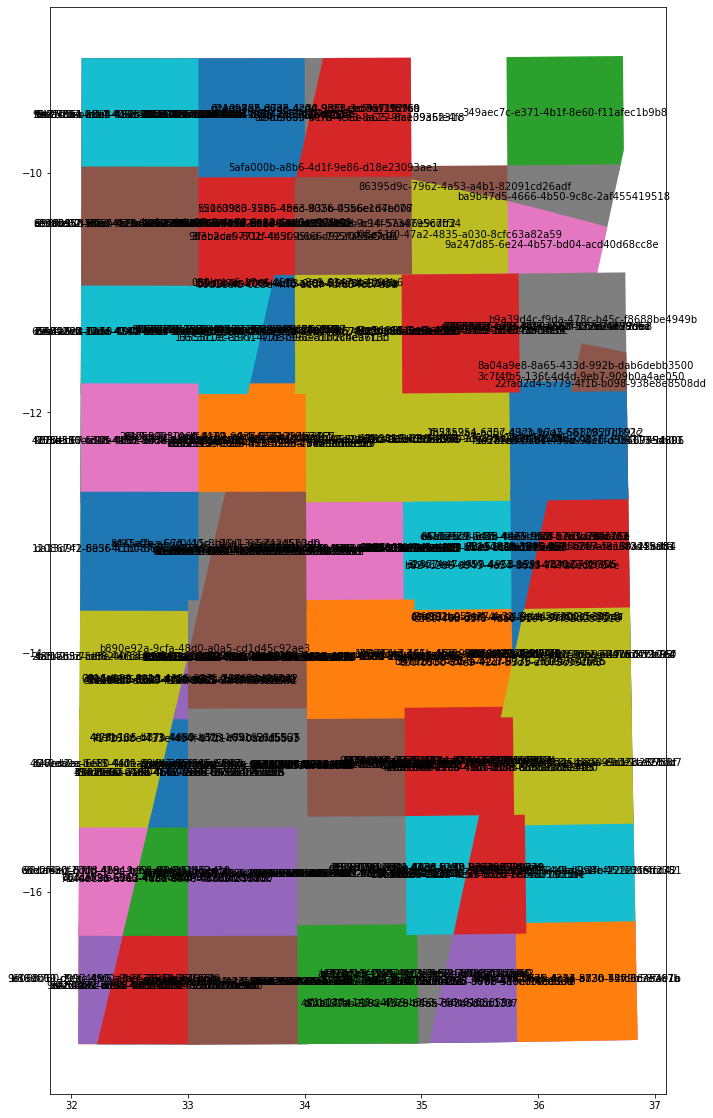

In [20]:
#areas.uuid
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [21]:
import matplotlib.pyplot as plt

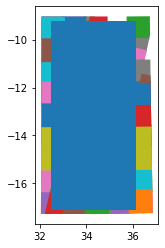

In [22]:

gdf2 = gpd.read_file(footp)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)

plt.show()

## Get the uuid and inspect produuct data

In [23]:
api.get_product_odata('39ccba0c-0109-4bb8-96a3-9658c9f59398')

{'id': '39ccba0c-0109-4bb8-96a3-9658c9f59398',
 'title': 'S2B_MSIL2A_20210920T073609_N0301_R092_T36LVJ_20210920T110122',
 'size': 410604742,
 'md5': '352dc74f8134dfb961f0abad0d5c00ff',
 'date': datetime.datetime(2021, 9, 20, 7, 36, 9, 24000),
 'footprint': 'POLYGON((32.65161167038561 -15.464163924146568,32.679800465327226 -15.346230591466298,32.715013203131186 -15.197996124339188,32.75058719768652 -15.049921280943911,32.7857073941645 -14.90169407889589,32.82088836992095 -14.753537173097502,32.856377392920045 -14.605531661174386,32.889093369541946 -14.471911559872142,33.09056606439947 -14.472270201486673,33.09098395530516 -15.46499836278845,32.65161167038561 -15.464163924146568))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('39ccba0c-0109-4bb8-96a3-9658c9f59398')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 9, 20, 15, 30, 20, 28000),
 'Ingestion Date': datetime.datetime(2021, 9, 20, 15, 29, 42, 545000),
 'quicklook_url': "https://scihub.copernicu

In [24]:
#api.download("39ccba0c-0109-4bb8-96a3-9658c9f59398")

# Downloading the data

In [25]:
api.download("97b37d7b-aff6-4b10-927f-325564629dec")

{'id': '97b37d7b-aff6-4b10-927f-325564629dec',
 'title': 'S2B_MSIL2A_20210920T073609_N0301_R092_T36LZN_20210920T110122',
 'size': 789935533,
 'md5': '87c349a1f3881b6ef7d6fcc213c10615',
 'date': datetime.datetime(2021, 9, 20, 7, 36, 9, 24000),
 'footprint': 'POLYGON((36.49877746639634 -10.8352951010353,36.48750693815519 -10.886595943983448,36.454541226531816 -11.035103948626872,36.422257528787696 -11.183752945876384,36.39209170918555 -11.32048607522106,36.389703686584326 -11.331280081060594,36.35688844686562 -11.479630877100297,36.32413151394414 -11.627993784268437,36.2912514357874 -11.77627797487728,36.27951656012916 -11.829065647609362,35.75303276173647 -11.835114647673327,35.743546007374796 -10.84325463083623,36.49877746639634 -10.8352951010353))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('97b37d7b-aff6-4b10-927f-325564629dec')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 9, 20, 15, 27, 16, 460000),
 'Ingestion Date': datetime.datetime(2021,

# Create RGB Image

In [33]:
# Open Bands 4, 3 and 2 with Rasterio
#R10 = 'C:/Users/jeannine/Documents/code/S2B_MSIL2A_20210920T073609_N0301_R092_T36LZN_20210920T110122.zip.SAFE/GRANULE/L2A_T36LZN_A023713_20210920T080048/IMG_DATA/R10m'
R10 = 'C:/Users/jeannine/Documents/code/S2B_MSIL2A_20210920T073609_N0301_R092_T36LZN_20210920T110122.SAFE/GRANULE/L2A_T36LZN_A023713_20210920T080048/IMG_DATA/R10m'
b4 = rio.open(R10+'/T36LZN_20210920T073609_B04_10m.jp2', driver='JP2OpenJPEG')
b3 = rio.open(R10+'/T36LZN_20210920T073609_B03_10m.jp2', driver='JP2OpenJPEG')
b2 = rio.open(R10+'/T36LZN_20210920T073609_B02_10m.jp2', driver='JP2OpenJPEG')
b8 = rio.open(R10+'/T36LZN_20210920T073609_B08_10m.jp2', driver='JP2OpenJPEG')


# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b8.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.write(b8.read(1),3) 
    rgb.close()

In [27]:
from rasterio import plot

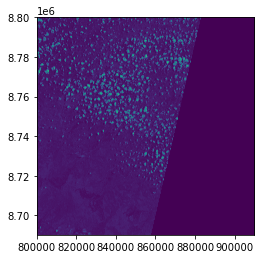

<AxesSubplot:>

In [28]:
plot.show(b4)

In [29]:
b8.transform



Affine(10.0, 0.0, 799980.0,
       0.0, -10.0, 8800000.0)

In [30]:
b8.read(1)

array([[2388, 2320, 2338, ...,    0,    0,    0],
       [2382, 2316, 2312, ...,    0,    0,    0],
       [2436, 2358, 2312, ...,    0,    0,    0],
       ...,
       [2044, 2552, 2204, ...,    0,    0,    0],
       [2002, 2348, 2224, ...,    0,    0,    0],
       [2072, 2214, 2232, ...,    0,    0,    0]], dtype=uint16)

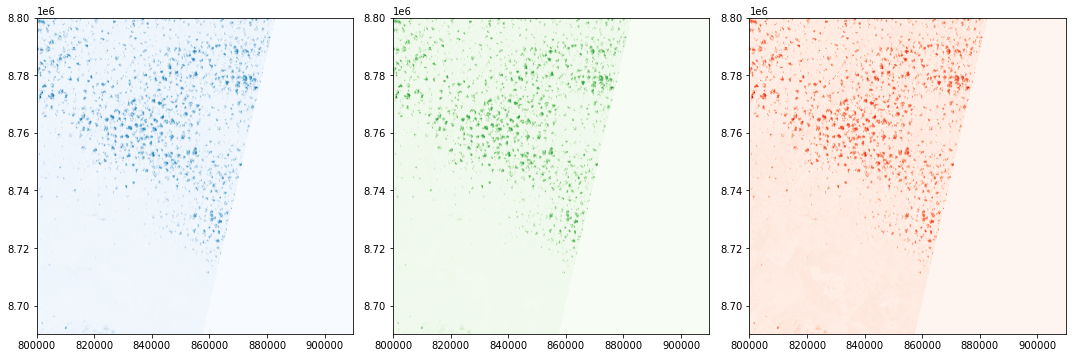

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,7))
plot.show(b2, ax=ax1, cmap='Blues')
plot.show(b3, ax=ax2, cmap='Greens')
plot.show(b4, ax=ax3, cmap='Reds')
#plot.show(b8, ax=ax4, cmap='Nirs')
fig.tight_layout()

# Create NDVI

In [34]:
b4 = rio.open(R10+'/T36LZN_20210920T073609_B04_10m.jp2')
b8 = rio.open(R10+'/T36LZN_20210920T073609_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))

C:\Users\jeannine\AppData\Local\Temp/ipykernel_8524/418865387.py:9: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir.astype(float)-red.astype(float))/(nir+red)


In [35]:
import georaster

# View an NDVI image

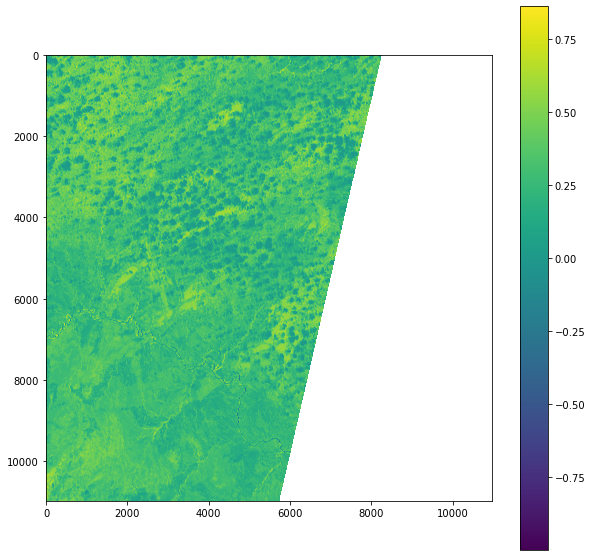

In [36]:
image = georaster.SingleBandRaster('C:/Users/jeannine/Documents/code/NDVI.tif')
plt.figure(figsize = (10,10))
plt.imshow(image.r)
plt.colorbar()

